<p style="color:teal; font-size:25px;">
Stock Market Risk Analysis & Correlation Analysis 

<p style="color:grey; font-size:20px;">
This notebook estimates Value at Risk using both the Geometric Brownian Motion + Monte Carlo Simulation and the built in quantile function, and investigates stock returns to determine wether a correlation between the stocks is present

In [3]:
## Imports + Setup
import pandas as pd
from pandas import Series, DataFrame 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style('whitegrid')
%matplotlib inline
!pip install yfinance
import yfinance as yf 
from datetime import datetime
from __future__ import division

<p style="color:blue; font-size:25px;">
#1. Data Collection 

<p style="color:black; font-size:20px;">
Before any data was collected from the web I decided to ask some peers for any stocks/crypto they may have been interested in seeing the value at risk using historical trends. 

In [4]:
gushy_choice = ['XRP-USD']
reet_choice = ['NVDA']

In [5]:
## Setting the time frames for our analysis 
end = datetime.now()

start = datetime(end.year - 1, end.month, end.day)

In [6]:
## Downloading the stock information from yahoo finance 
for coin in gushy_choice:
    clean_name = coin.replace('-', '_')
    globals()[clean_name] = yf.download(coin, start = start, end = end, auto_adjust = False)

for stock in reet_choice:
    globals()[stock] = yf.download(stock, start = start, end = end, auto_adjust = False)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
## Let's Start With Gushy's choice and analyze the crypto currency XRP 

In [8]:
## To make this simpler we are going to retrieve the adjusted daily closing prices 
closing_df_xrp = yf.download(coin, start = start, end = end, auto_adjust = False)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [9]:
## And get those prices displayed as percentage changes, to assess historical votality 
xrp_rets = closing_df_xrp.pct_change()

In [10]:
xrp_rets.head()

Ticker,XRP-USD
Date,
2024-08-06,NaN
2024-08-07,0.188083
2024-08-08,0.027907
2024-08-09,-0.058979
2024-08-10,0.007616


In [11]:
## Now lets retrieve the needed stock information for NVDA

In [12]:
closing_df_nvda = yf.download(stock, start = start, end = end, auto_adjust = False)['Adj Close']
nvda_rets = closing_df_nvda.pct_change()

[*********************100%***********************]  1 of 1 completed


In [13]:
nvda_rets.head()

Ticker,NVDA
Date,
2024-08-06,NaN
2024-08-07,-0.051223
2024-08-08,0.061268
2024-08-09,-0.002096
2024-08-12,0.040764


<p style="color:blue; font-size:25px;">
#2. A.) Historical VaR, Value at Risk Estimation

In [14]:
xrp_rets['XRP-USD'].quantile(0.10)

np.float64(-0.0422741713966599)

In [15]:
xrp_rets['XRP-USD'].quantile(0.25)

np.float64(-0.017457493620140596)

In [16]:
xrp_rets['XRP-USD'].quantile(0.50)

np.float64(0.0020051546633308437)

<p style="color:orange; font-size:20px;">
Interpretation:

<p style="color:grey; font-size:15px;">
The 90 percent value at risk for XRP is -4.227%, which means there is only a 10 percent chance that loss will exceed 4.227 percent on any given day.

<p style="color:grey; font-size:15px;">
The 75 percent value at risk for XRP is -1.745%, which means there is only a 25 percent chance that loss will exceed 1.745 percent on any given day.

<p style="color:grey; font-size:15px;">
The 50 percent value at risk for XRP is +0.201%, which means there is only a 50 percent chance that gain will exceed 0.201 percent on any given day.

In [17]:
nvda_rets['NVDA'].quantile(0.05)

np.float64(-0.051001761132657905)

In [18]:
nvda_rets['NVDA'].quantile(0.01)

np.float64(-0.08590122658932349)

In [19]:
nvda_rets['NVDA'].quantile(0.001)

np.float64(-0.15122264003855138)

<p style="color:purple; font-size:20px;">
Interpretation:

<p style="color:grey; font-size:15px;">
The 95 percent value at risk for XRP is -5.1%, which means there is only a 5 percent chance that loss will exceed 5.1 percent on any given day.

<p style="color:grey; font-size:15px;">
The 99 percent value at risk for XRP is -8.6%, which means there is only a 1 percent chance that loss will exceed 8.6 percent on any given day.

<p style="color:grey; font-size:15px;">
The 99.99 percent value at risk for XRP is -15.12%, which means there is only a 0.1 percent chance that loss will exceed 15.12 percent on any given day.

<p style="color:blue; font-size:25px;">
#2. B.) Monte Carlo Simulation VaR 

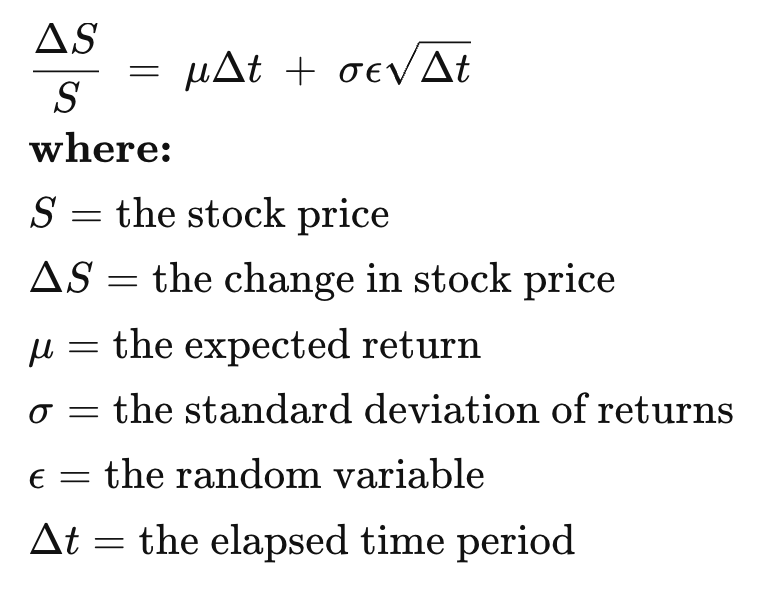

In [20]:
from IPython.display import Image
Image("GBM.png")

<p style="color:grey; font-size:15px;">
To simulate what future trends of how both XRP and NVDA will behave we need to define these variables in the Geometric Brown Motion Equation 

In [21]:
## Here we are defining variables to later assign them 
mu = xrp_rets.mean()

sigma = xrp_rets.std()

days = 365 

dt = 1/days 

In [40]:
## Defining our equation with the variables defined previously 

def xrp_monte_carlo(mu, sigma, days, start_price):

    price = np.zeros(days)
    price[0] = start_price 
    shock = np.zeros(days)
    drift = np.zeros(days)

    for x in range(1, days):
        
        ## The drift equation gives us a more balanced outcome
        drift[x] = mu - (0.5)*(sigma**2)
        
        ## The shock equation is what acts as the more sporatic unpredictable outcome
        shock[x] = (sigma * np.random.normal() * np.sqrt(dt))
        
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))

    return price

In [41]:
XRP_USD.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,XRP-USD,XRP-USD,XRP-USD,XRP-USD,XRP-USD,XRP-USD
Date,,,,,,
2024-08-06,0.505697,0.505697,0.518503,0.489296,0.489458,1747524592
2024-08-07,0.600810,0.600810,0.640819,0.494230,0.505691,4286385926
2024-08-08,0.617577,0.617577,0.641619,0.580908,0.600849,3502679662
2024-08-09,0.581153,0.581153,0.623707,0.569023,0.617580,2024450473
2024-08-10,0.585579,0.585579,0.601367,0.579598,0.581151,1134054567


/var/folders/dw/k736zws972145tgzpr3fx1dh0000gn/T/ipykernel_53859/1487511737.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  drift[x] = mu - (0.5)*(sigma**2)
/var/folders/dw/k736zws972145tgzpr3fx1dh0000gn/T/ipykernel_53859/1487511737.py:15: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  shock[x] = (sigma * np.random.normal() * np.sqrt(dt))


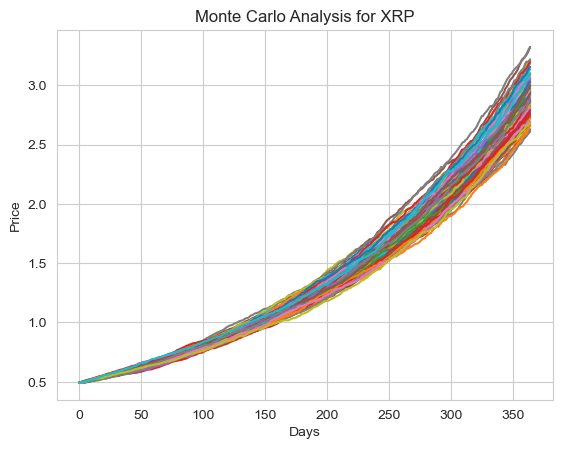

In [24]:
start_price = 0.49 

for run in range(100):
    plt.plot(xrp_monte_carlo(mu, sigma, days, start_price))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for XRP')
plt.show()

<p style="color: maroon; font-size:20px;">
Interpretation:
This Monte Carlo Simulation was ran 100 hundred times over a time period of 365 days. 
From the direction in which all of our runs are directed the behavior of XRP based on the information 
we passed seems to be on an upward trend. 

In [42]:
nvda_mu = nvda_rets.mean()

nvda_sigma = nvda_rets.std()

days = 365 

dt = 1/days 

In [43]:
def nvda_monte_carlo(nvda_mu, nvda_sigma, days, start_price):

    price = np.zeros(days)
    price[0] = start_price 
    shock = np.zeros(days)
    drift = np.zeros(days)

    for x in range(1, days):

        drift[x] = nvda_mu - (0.5)*(nvda_sigma**2)
        shock[x] = (nvda_sigma * np.random.normal() * np.sqrt(dt))
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))

    return price

In [44]:
NVDA.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,,
2024-08-06,104.217072,104.250000,107.709999,100.550003,103.839996,409012100
2024-08-07,98.878769,98.910004,108.800003,98.690002,107.809998,411440400
2024-08-08,104.936852,104.970001,105.500000,97.519997,102.000000,391910000
2024-08-09,104.716919,104.750000,106.599998,103.430000,105.639999,290844200
2024-08-12,108.985573,109.019997,111.070000,106.260002,106.320000,325559900


/var/folders/dw/k736zws972145tgzpr3fx1dh0000gn/T/ipykernel_53859/4049172352.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  drift[x] = nvda_mu - (0.5)*(nvda_sigma**2)
/var/folders/dw/k736zws972145tgzpr3fx1dh0000gn/T/ipykernel_53859/4049172352.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  shock[x] = (nvda_sigma * np.random.normal() * np.sqrt(dt))


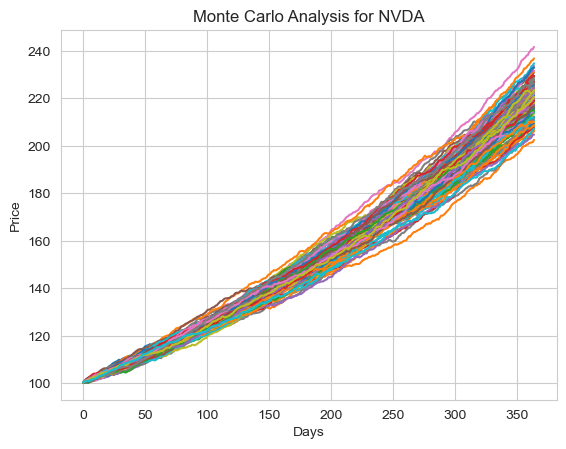

In [45]:
start_price = 100.42 

for run in range(100):
    plt.plot(nvda_monte_carlo(nvda_mu, nvda_sigma, days, start_price))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for NVDA')
plt.show()

<p style="color: maroon; font-size:20px;">
Interpretation:
This Monte Carlo Simulation was ran 100 hundred times over a time period of 365 days. 
From the direction in which all of our runs are directed the behavior of NVDA based on the information 
we passed seems to be on an upward trend, although not as dramatic of a peak as XRP. 

<p style="color:blue; font-size:25px;">
#3. Correlation Analysis, NIKE vs. Adidas 

In [46]:
gurki_choice = ['NKE', 'ADDYY']

In [47]:
for stock in gurki_choice:
    globals()[stock] = yf.download(stock, start = start, end = end, auto_adjust = False)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [48]:
NKE.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,NKE,NKE,NKE,NKE,NKE,NKE
Date,,,,,,
2024-08-06,70.978195,72.500000,73.239998,71.510002,71.660004,13469700
2024-08-07,71.095673,72.620003,74.209999,72.529999,72.879997,9571200
2024-08-08,72.632721,74.190002,74.209999,73.050003,73.230003,8828000
2024-08-09,72.779564,74.339996,74.580002,73.370003,74.120003,7186600
2024-08-12,73.073273,74.639999,75.000000,74.050003,74.709999,7067300


In [49]:
ADDYY.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,ADDYY,ADDYY,ADDYY,ADDYY,ADDYY,ADDYY
Date,,,,,,
2024-08-06,116.430000,116.430000,117.629997,114.440002,114.540001,37000
2024-08-07,116.919998,116.919998,118.940002,115.989998,116.610001,35300
2024-08-08,117.760002,117.760002,118.209999,116.430000,116.650002,38000
2024-08-09,117.260002,117.260002,117.779999,116.330002,117.779999,18100
2024-08-12,116.180000,116.180000,117.620003,115.720001,116.889999,39500


In [50]:
## Here we are trying to single out the adjusted closing prices of both Nike and Adidas 
na_closing_df = yf.download(gurki_choice, start = start, end = end, auto_adjust = False)['Adj Close']

[*********************100%***********************]  2 of 2 completed


In [51]:
## Getting those adjusted closing prices as percentages 
na_rets = na_closing_df.pct_change()

In [52]:
na_rets.head()

Ticker,ADDYY,NKE
Date,,
2024-08-06,NaN,NaN
2024-08-07,0.004209,0.001655
2024-08-08,0.007184,0.021619
2024-08-09,-0.004246,0.002022
2024-08-12,-0.009210,0.004036


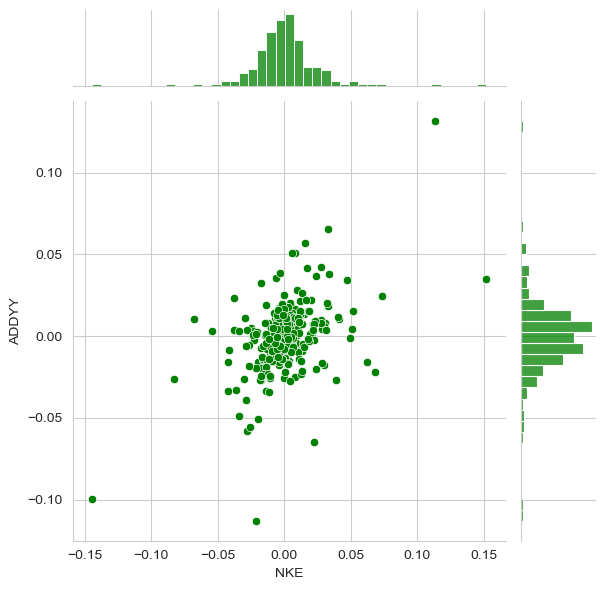

In [53]:
sns.jointplot(x = 'NKE', y = 'ADDYY', data = na_rets, color = 'green')
plt.show()

In [54]:
na_rets.corr()

Ticker,ADDYY,NKE
Ticker,,
ADDYY,1.000000,0.480324
NKE,0.480324,1.000000


<p style="color: green; font-size:20px;">
Interpretation:
From the jointplot generated earlier, we can see there is pretty much no correlation between Nike and Adidas. 
Which I did not expect as these are two giants in the clothing industry especially in the athleticwear niche. 
Using the .corr function gave us a correlation of 0.48 which is a low to moderate correlation between the two. 